**Overview**

Will be using a Naive Bayes Classifier on Yelp review data, in order to determine if feedback was 'positive' or 'negative'. This will require feature engineering in order to produce the most accurate classifier.

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearngit ad
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Read text file in and assign own headers

yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['Review', 'Positive or Negative']

In [9]:
#Take a look at the data

yelp_raw.head(5)

,Review,Positive or Negative
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [10]:
#Create keywords list to form the basis of our Naive Bayes Classifier

keywords = ['worst', 'slow', 'pricey', 'poor', 'bad', 'rude', 'disappointed', 
            'avoid', 'nasty', 'sick', 'average', 'not', 'terrible', 'wait', 'but',
            'good', 'like', 'great', 'definitely', 'don\'t', 'recommend', 'didn\'t']

for key in keywords:
    yelp_raw[str(key)] = yelp_raw.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

**Note:** Since one of the main assumptions of the Naive Bayes Classifier is that the variables are independent of eachother, let's look at a correlation matrix to see if this is the case.

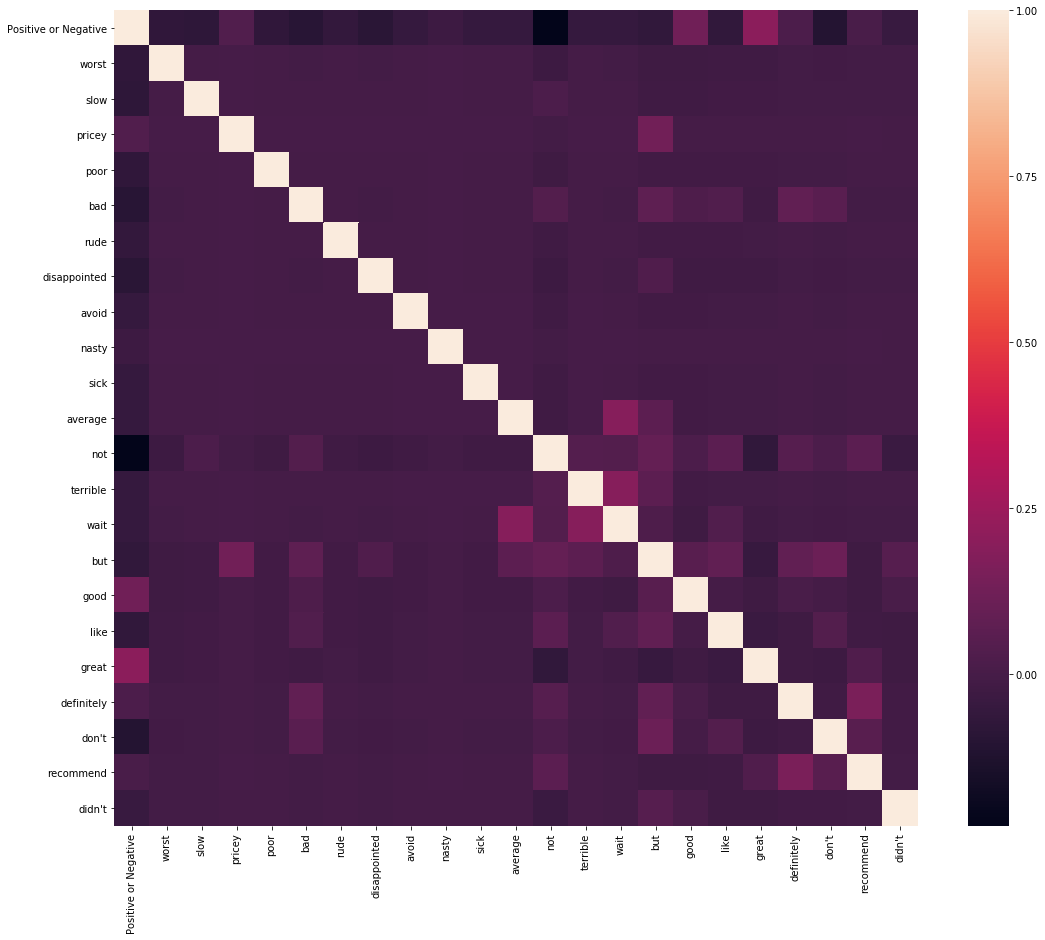

In [11]:
#Correlation matrix with sns.heatmap

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(18, 15))

sns.heatmap(yelp_raw.corr())
plt.show()

This matrix should be good enough. Ideally, we would want no correlation whatsoever. However, although there is some correlation across the board, there is none greater than 0.25 and that should still yield strong results.

In [12]:
#Before we actually run the model we have to build out our training data. Specify an outcome (y or dependent variable) and 
#the inputs (x or independent variables). We'll do that below under the variables data and target

data = yelp_raw[keywords]
target = yelp_raw['Positive or Negative']

In [13]:
#Since data is binary / boolean, need to import the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
NB_Model = BernoulliNB()

# Fit our model to the data.
NB_Model.fit(data, target)

# Classify, storing the result in a new variable.
positive_predictor = NB_Model.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != positive_predictor).sum()))

Number of mislabeled points out of a total 1000 points : 356


In [8]:
#Confusion matrix to better understand results

from sklearn.metrics import confusion_matrix
confusion_matrix(target, positive_predictor)

array([[137, 363],
       [ 19, 481]])

## Let's look at our first model and then create a few more versions.
1. Do any of your classifiers seem to overfit?
2. Which seem to perform the best? Why?
3. Which features seemed to be most impactful to performance?

In [9]:
#New column that splits reviews
yelp_raw['ReviewSplit'] = yelp_raw['Review'].apply(lambda x: str(x).split())

In [10]:
#Now get a unique count of each word in all reviews. First create 'counts' variable.

from collections import Counter
counts = yelp_raw.ReviewSplit.map(Counter).sum()

In [34]:
#View most commmon words

counts.most_common(150)

[('the', 405),
 ('and', 378),
 ('I', 294),
 ('was', 292),
 ('a', 228),
 ('to', 213),
 ('The', 177),
 ('is', 171),
 ('of', 123),
 ('not', 103),
 ('for', 102),
 ('in', 98),
 ('this', 95),
 ('it', 82),
 ('food', 80),
 ('place', 76),
 ('with', 71),
 ('had', 65),
 ('be', 65),
 ('are', 62),
 ('were', 61),
 ('very', 60),
 ('so', 59),
 ('that', 59),
 ('have', 59),
 ('good', 56),
 ('but', 56),
 ('my', 52),
 ('you', 52),
 ('at', 52),
 ('on', 49),
 ('This', 46),
 ('like', 45),
 ('we', 45),
 ('service', 41),
 ('they', 38),
 ('great', 37),
 ('go', 37),
 ('here', 36),
 ('time', 35),
 ('our', 35),
 ('We', 34),
 ('back', 34),
 ('really', 31),
 ('just', 30),
 ('as', 30),
 ('will', 30),
 ('an', 28),
 ('all', 27),
 ('It', 27),
 ('would', 25),
 ('been', 23),
 ('your', 23),
 ('only', 23),
 ('their', 23),
 ('good.', 22),
 ("don't", 22),
 ('ever', 21),
 ('also', 21),
 ('-', 21),
 ('there', 21),
 ('from', 21),
 ('place.', 20),
 ('came', 20),
 ('My', 20),
 ('out', 20),
 ("I've", 20),
 ("I'm", 20),
 ('up', 19),

**Model 1** - Original Model

In [12]:
#Perform Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(NB_Model, data, target, cv=10)

array([0.63, 0.59, 0.63, 0.57, 0.6 , 0.65, 0.65, 0.63, 0.6 , 0.62])

In [13]:
#Create Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(target, positive_predictor)

array([[137, 363],
       [ 19, 481]])

**Takeaway:** Scores are not fluctuating too much during cross-validation, indicating that the model is not overfitting. Further, the confusion matrix shows that the model is far more accurate in predicting negative reviews, specifically at a 96.2% rate. 

**Model 2** - Remove a Couple Features

In [33]:
#Look at 'Sick' and 'Nasty' to see how common they are

print(counts['sick'])
print(counts['nasty'])

3
1


In [ ]:
#Since these are not common at all, let's remove them and run our model

yelp_raw.drop(columns=['sick', 'nasty'], inplace=True)

In [15]:
#Establish Y and X variables
data2 = yelp_raw.loc[:,'worst':'wait']
target2 = yelp_raw['Positive or Negative']

# Instantiate our model and store it in a new variable.
NB_Model2 = BernoulliNB()


# Fit our model to the data.
NB_Model2.fit(data2, target2)

# Classify, storing the result in a new variable.
positive_predictor2 = NB_Model2.predict(data2)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data2.shape[0],
    (target2 != positive_predictor2).sum()))

Number of mislabeled points out of a total 1000 points : 386


In [16]:
#Perform Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(NB_Model2, data2, target2, cv=10)

array([0.63, 0.59, 0.62, 0.56, 0.6 , 0.65, 0.64, 0.63, 0.6 , 0.62])

In [17]:
#Create Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(target2, positive_predictor2)

array([[133, 367],
       [ 19, 481]])

**Takeaway:** After removing 'sick' and 'nasty' from the original model, there was not much change in the results. Scores are not fluctuating too much during cross-validation, indicating that the model is not overfitting. However, in the confusion matrix, you can see that while our prediction of negative reviews remained the same, our prediction of positive reviews dropped from 27.4% to 26%. Not a large difference, but a difference nonetheless.

**Model 3** - Add a couple new features

In [35]:
yelp_model3 = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_model3.columns = ['Review', 'Positive or Negative']

In [36]:
#After reviewing the most common counts above, decided to add a few new features ('but', 'won't')

keywords = ['worst', 'slow', 'pricey', 'poor', 'bad', 'rude', 'disappointed', 
            'avoid', 'nasty', 'sick', 'average', 'not', 'terrible', 'wait', 'but', 'won\'t']

for key in keywords:
    yelp_model3[str(key)] = yelp_model3.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [37]:
#Establish Y and X variables
data3 = yelp_model3[keywords]
target3 = yelp_model3['Positive or Negative']

# Instantiate our model and store it in a new variable.
NB_Model3 = BernoulliNB()


# Fit our model to the data.
NB_Model3.fit(data3, target3)

# Classify, storing the result in a new variable.
positive_predictor3 = NB_Model3.predict(data3)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data3.shape[0],
    (target3 != positive_predictor3).sum()))

Number of mislabeled points out of a total 1000 points : 370


In [38]:
#Perform Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(NB_Model3, data3, target3, cv=10)

array([0.65, 0.59, 0.62, 0.56, 0.56, 0.66, 0.68, 0.66, 0.67, 0.63])

In [39]:
#Create Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(target3, positive_predictor3)

array([[170, 330],
       [ 40, 460]])

**Takeaway:** Seems that there may be some overfitting based on the fluctuation seen during cross-validation. However, the model was more successful by adding 'but' and 'won't to our model.

**Model 4** - Add a couple new features and remove a couple existing features

In [45]:
#Look at a couple existing features to see how prevalent they are

print(counts['pricey'])
print(counts['rude'])

1
4


In [46]:
yelp_model4 = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_model4.columns = ['Review', 'Positive or Negative']

In [47]:
#Add 'don't' and 'never' to the model, remove 'pricey' and 'rude'

keywords = ['worst', 'slow', 'poor', 'bad', 'disappointed', 'avoid', 'nasty', 'sick',
            'average', 'not', 'terrible', 'wait', 'but', 'don\'t', 'never']

for key in keywords:
    yelp_model4[str(key)] = yelp_model4.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [49]:
#Establish Y and X variables
data4 = yelp_model4[keywords]
target4 = yelp_model4['Positive or Negative']

# Instantiate our model and store it in a new variable.
NB_Model4 = BernoulliNB()


# Fit our model to the data.
NB_Model4.fit(data4, target4)

# Classify, storing the result in a new variable.
positive_predictor4 = NB_Model4.predict(data4)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data4.shape[0],
    (target4 != positive_predictor4).sum()))

Number of mislabeled points out of a total 1000 points : 354


In [50]:
#Perform Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(NB_Model4, data4, target4, cv=10)

array([0.7 , 0.61, 0.68, 0.61, 0.58, 0.65, 0.68, 0.65, 0.65, 0.64])

In [51]:
#Create Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(target4, positive_predictor4)

array([[185, 315],
       [ 39, 461]])

**Takeaway:** Similar to the last model version, we are seeing evidence of overfitting once again. At the same time, our model is the most successful it has been thus far.

**Model 5** - Change features to try and identify positive reviews instead of negative

In [52]:
yelp_model5 = pd.read_csv('yelp_labelled.txt', delimiter= '\t', header=None)
yelp_model5.columns = ['Review', 'Positive or Negative']

In [53]:
#Redo model using positive words

keywords = ['Good', 'good', 'like', 'great', 'best', 'recommend', 'definitely', 'love',
            'nice', 'good.', 'really', 'quality', 'back.']

for key in keywords:
    yelp_model5[str(key)] = yelp_model5.Review.str.contains(
        ' ' + str(key) + ' ',
        case=False)

In [55]:
#Establish Y and X variables
data5 = yelp_model5[keywords]
target5 = yelp_model5['Positive or Negative']

# Instantiate our model and store it in a new variable.
NB_Model5 = BernoulliNB()


# Fit our model to the data.
NB_Model5.fit(data5, target5)

# Classify, storing the result in a new variable.
positive_predictor5 = NB_Model5.predict(data5)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data5.shape[0],
    (target5 != positive_predictor5).sum()))

Number of mislabeled points out of a total 1000 points : 399


In [56]:
#Perform Cross-Validation

from sklearn.model_selection import cross_val_score
cross_val_score(NB_Model5, data5, target5, cv=10)

array([0.6 , 0.63, 0.57, 0.6 , 0.61, 0.57, 0.61, 0.57, 0.57, 0.65])

In [57]:
#Create Confusion Matrix

from sklearn.metrics import confusion_matrix
confusion_matrix(target5, positive_predictor5)

array([[470,  30],
       [369, 131]])

**Takeaway:** Evidence for overfitting not as strong in previous model versions. However, we did lose overall accuracy. We did accomplish the goal of this version by seeing a very large reduction in Type 1 errors.

### Evaluating Performance of Features

In [100]:
# #Function for backwards pass - removing features and running model

while len(data.columns) > 1:
    data.drop(data.columns[[-1,]], axis=1, inplace=True)
    NB_Model = BernoulliNB()
    NB_Model.fit(data, target)
    positive_predictor = NB_Model.predict(data)
    print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != positive_predictor).sum()))

Number of mislabeled points out of a total 1000 points : 383
Number of mislabeled points out of a total 1000 points : 385
Number of mislabeled points out of a total 1000 points : 451
Number of mislabeled points out of a total 1000 points : 454
Number of mislabeled points out of a total 1000 points : 457
Number of mislabeled points out of a total 1000 points : 458
Number of mislabeled points out of a total 1000 points : 461
Number of mislabeled points out of a total 1000 points : 469
Number of mislabeled points out of a total 1000 points : 473
Number of mislabeled points out of a total 1000 points : 482
Number of mislabeled points out of a total 1000 points : 487
Number of mislabeled points out of a total 1000 points : 487
Number of mislabeled points out of a total 1000 points : 493


**Takeaway:** Based on the output above, looking at our original model, it looks like most of our features are marginally important. The most important by far is the keyword 'not', which corresponds in the change from 385 to 451 mislabeled.